<a href="https://colab.research.google.com/github/Jittiya/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means

###Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y=make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##Explore data

In [3]:
X.shape

(500, 2)

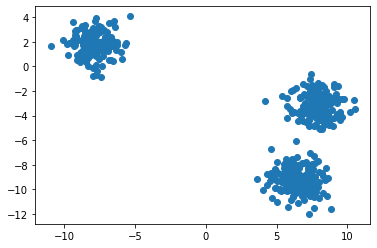

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

####Import

In [5]:
from sklearn.cluster import KMeans

####Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

####Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

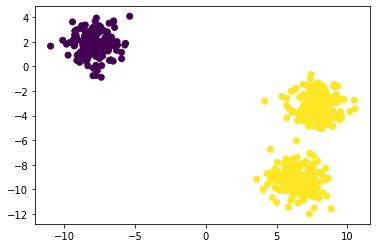

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

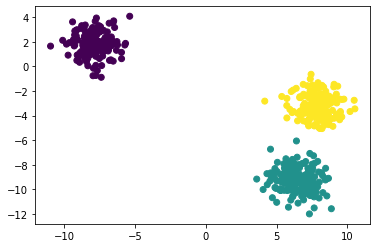

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

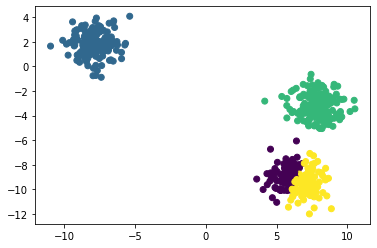

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

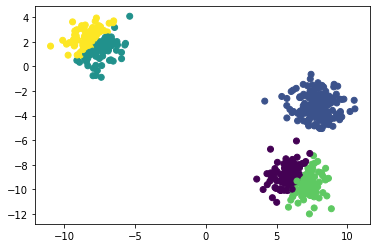

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

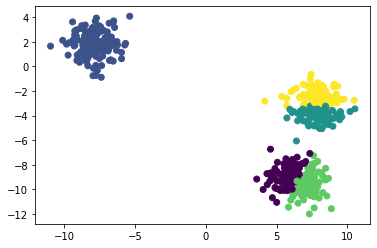

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### Example Application(Color Quantization)

In [14]:
import cv2
import os

In [17]:
img = cv2.imread('/content/chinchilla-1024x683.jpg.crdownload')

In [18]:
img.shape

(683, 1024, 3)

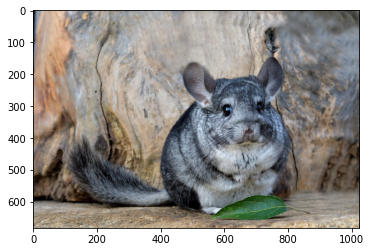

In [19]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#### นับจำนวนสี

In [20]:
import numpy as np

In [21]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(79037, 3)

จัดกลุ่มสีให้เหลือ 16 สี

In [22]:
myquantize = KMeans(n_clusters=16, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [23]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row

array([[ 18,  23,  27],
       [ 19,  24,  28],
       [ 21,  26,  30],
       ...,
       [196, 180, 146],
       [189, 173, 139],
       [176, 160, 126]], dtype=uint8)

In [24]:
final_color = myquantize.fit_predict(img_row)

#### ใช้ centorid เป็นตัวแทนของสี

In [25]:
centroid = myquantize.cluster_centers_

In [26]:
centroid

array([[107.13788556, 111.35370723, 116.33268005],
       [202.00963824, 177.72145473, 154.11061492],
       [153.8131815 , 143.26127136, 131.56898152],
       [ 19.20171827,  18.24037945,  15.96057813],
       [ 47.51418664,  47.28488868,  43.20279605],
       [179.61288075, 177.69097535, 176.33411249],
       [198.79135116, 195.76975095, 192.03632862],
       [171.1060888 , 162.80111943, 153.91761591],
       [ 59.74288301,  69.79814119,  72.45865623],
       [116.07137554, 102.41340395,  87.38412612],
       [143.1751699 , 151.22232345, 161.37045701],
       [141.22784757, 124.27735482, 106.76475067],
       [ 89.11976107,  77.46957827,  63.62782348],
       [123.62796658, 130.06950274, 138.2682031 ],
       [181.13703296, 150.89520402, 122.70463772],
       [ 85.33695629,  91.30734071,  96.50491838]])

แทนสีลงไป

In [27]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
     for j in range(RGB_img.shape[1]):
          new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

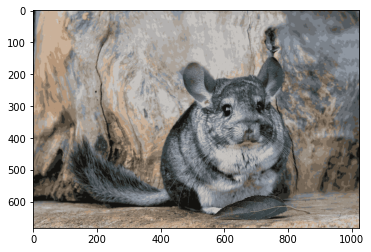

In [28]:
plt.imshow(new_img/255)

In [29]:
plt.imsave('img.jpg',new_img/255)

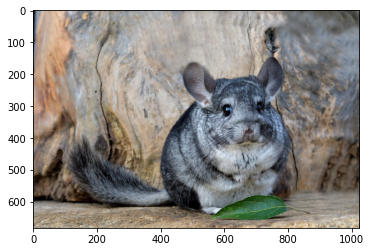

In [30]:
plt.imshow(RGB_img)